In [1]:
import sounddevice as sd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
import scipy.io.wavfile as wav
from scipy.fftpack import fft, ifft, fftfreq
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = [16, 5]

In [2]:
def str2bits(str):
    res = bin(int.from_bytes(str.encode('ascii'), 'big'))[2:]
    return '0'*(8 - (len(res) % 8)) + res

In [3]:
from pam import SoundCommunication

In [4]:
msg = """
[ 7071.657145] CPU3: Core temperature above threshold, cpu clock throttled (total events = 88)
[ 7071.657156] CPU2: Core temperature above threshold, cpu cloc
"""

In [5]:
r = msg.encode('ascii')
comm = SoundCommunication(44100, 20, 1000, 2000)

from testing import Tester
t = Tester(comm)
S = comm.send(r)

In [6]:
assert comm.decode(t.pad(S))[:len(r)] == r

In [ ]:
# _, W = wav.read('w.wav')

In [10]:
# wav.write('w.wav', data=W, rate=comm.FS)

In [15]:
#transmission
sd.play(t.pad(S), samplerate=comm.FS)

In [7]:
#recording
W = sd.rec(int(10 * comm.FS), channels=1, samplerate=comm.FS, blocking=True).ravel()

NOTE: Enter 'c' at the ipdb>  prompt to continue execution.
> <string>(2)<module>()

ipdb> break comm.decode
Breakpoint 1 at /home/pietro/Documents/epfl/bachelor6/PDC/over_the_air/pam.py:80
ipdb> cont
> /home/pietro/Documents/epfl/bachelor6/PDC/over_the_air/pam.py(81)decode()
     79 
1    80     def decode(self, W, debug=False):
---> 81         W = np.copy(W)
     82         #W = self.bandpass_filter(W, self.freqbot, self.freqtop)
     83         correlating_sync = self.corr_signal()

ipdb> next
> /home/pietro/Documents/epfl/bachelor6/PDC/over_the_air/pam.py(83)decode()
     81         W = np.copy(W)
     82         #W = self.bandpass_filter(W, self.freqbot, self.freqtop)
---> 83         correlating_sync = self.corr_signal()
     84 
     85         corr = self._correlate(W[:(self.symlen + self.synclen) * self.symsamp], correlating_sync)

ipdb> sd.play(W)
ipdb> sd.play(W)
ipdb> next
> /home/pietro/Documents/epfl/bachelor6/PDC/over_the_air/pam.py(85)decode()
     83         correlating

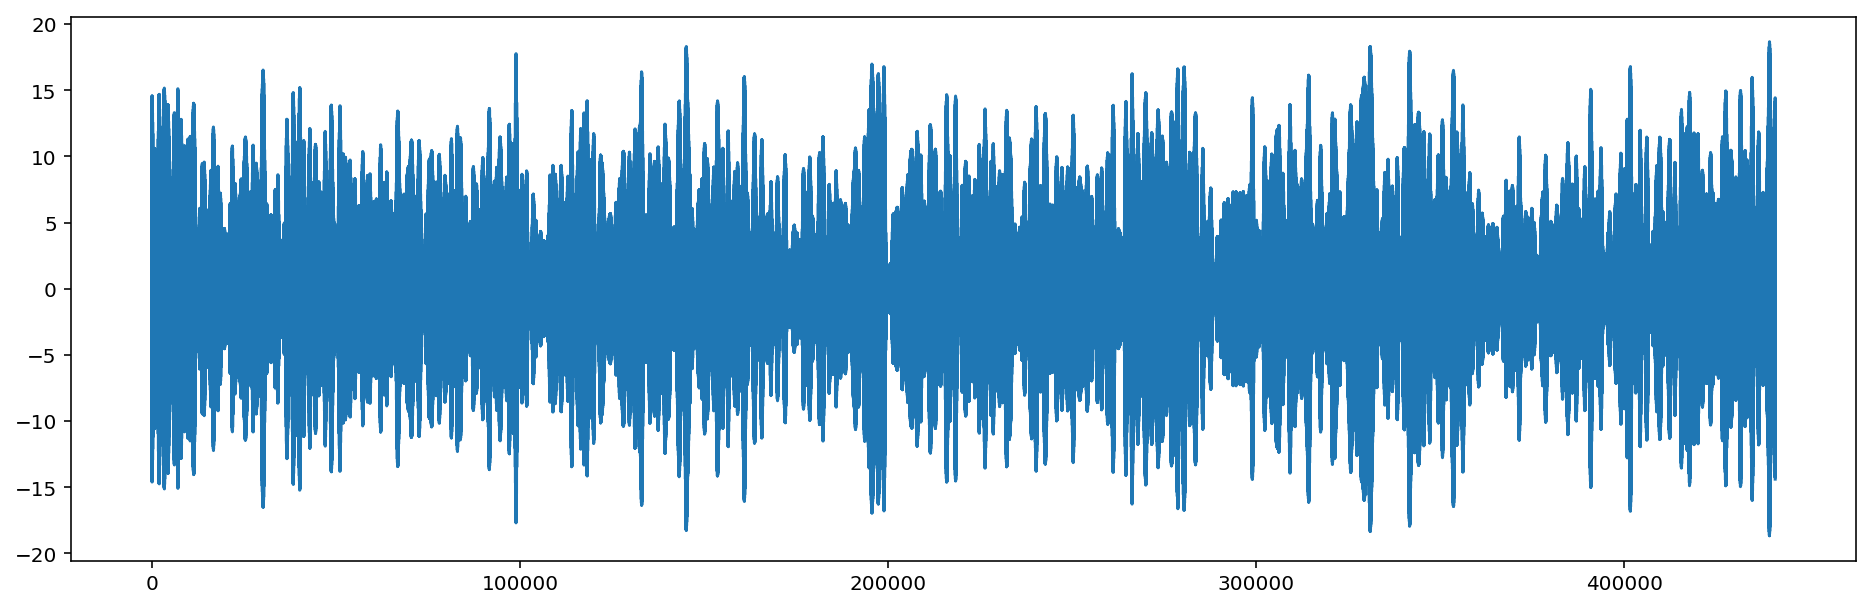

ipdb> next
> /home/pietro/Documents/epfl/bachelor6/PDC/over_the_air/pam.py(89)decode()
     87 
     88 
---> 89         start_sync = np.argmax(np.abs(corr)) # take the absolute value because the microphone
     90                                             # could inverse + and -
     91         if corr[start_sync] < 0:

ipdb> next
> /home/pietro/Documents/epfl/bachelor6/PDC/over_the_air/pam.py(91)decode()
     89         start_sync = np.argmax(np.abs(corr)) # take the absolute value because the microphone
     90                                             # could inverse + and -
---> 91         if corr[start_sync] < 0:
     92             W = -W
     93 

ipdb> sd.play(W[start_sync:])
ipdb> start_sync
439441
ipdb> p start_sync
439441
ipdb> p W.size
441000
ipdb> next
> /home/pietro/Documents/epfl/bachelor6/PDC/over_the_air/pam.py(92)decode()
     90                                             # could inverse + and -
     91         if corr[start_sync] < 0:
---> 92             W = -W

ipdb> p i
1
ipdb> p win.size
0


In [ ]:
%%debug
wr = comm.decode(W)

In [19]:
#decoding and testing result
# wr = comm.decode(W)
wr = comm.decode(W)
t.diff(wr[:len(r)], r)

('0000X0X00X0XX0XX00X0000000XX0XXX00XX000000XX0XXX00XX000X00X0XXX000XX0XX000XX0X0X00XX0XXX00XX000X00XX0X0000XX0X0X0X0XXX0X00X000000X0000XX0X0X00000X0X0X0X00XX00XX00XXX0X000X000000X0000XX0XX0XXXX0XXX00X00XX00X0X00X000000XXX0X000XX00X0X0XX0XX0X0XXX00000XX00X0X0XXX00X00XX0000X0XXX0X000XXX0X0X0XXX00X00XX00X0X00X000000XX0000X0XX000X00XX0XXXX0XXX0XX00XX00X0X00X000000XXX0X000XX0X0000XXX00X00XX00X0X0XXX00XX0XX0X0000XX0XXXX0XX0XX000XX00X0000X0XX0000X000000XX000XX0XXX00000XXX0X0X00X000000XX000XX0XX0XX000XX0XXXX0XX000XX0XX0X0XX00X000000XXX0X000XX0X0000XXX00X00XX0XXXX0XXX0X000XXX0X000XX0XX000XX00X0X0XX00X0000X0000000X0X0000XXX0X000XX0XXXX0XXX0X000XX0000X0XX0XX0000X000000XX00X0X0XXX0XX00XX00X0X0XX0XXX00XXX0X000XXX00XX00X0000000XXXX0X00X0000000XXX00000XXX00000X0X00X0000X0X00X0XX0XX00X0000000XX0XXX00XX000000XX0XXX00XX000X00X0XXX000XX0XX000XX0X0X00XX0XXX00XX000X00XX0X0X00XX0XX00X0XXX0X00X000000X0000XX0X0X00000X0X0X0X00XX00X000XXX0X000X000000X0000XX0XX0XXXX0XXX00X00XX00X0X00X000000XXX0X000XX00X0X0XX0XX